In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising_multi = pd.read_csv("advertising.csv")
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


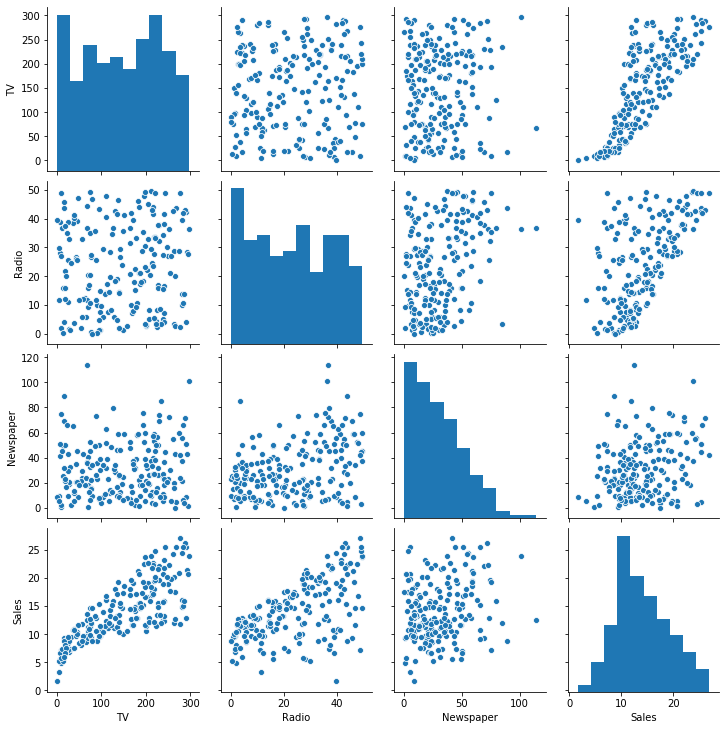

In [5]:
sns.pairplot(advertising_multi)

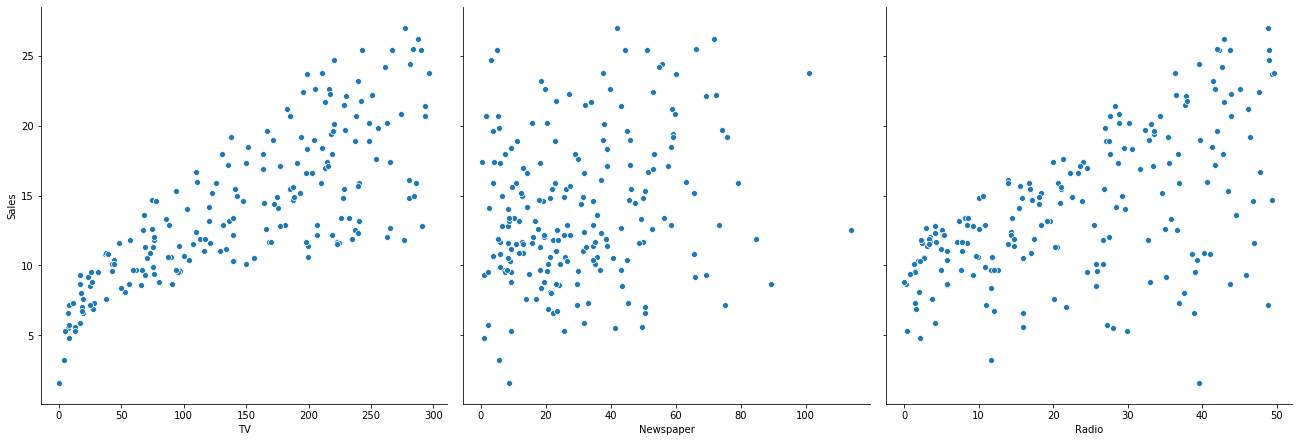

In [6]:
sns.pairplot(advertising_multi, x_vars=["TV", "Newspaper", "Radio"], y_vars=["Sales"], height=6)

In [7]:
X = advertising_multi[["TV", "Radio", "Newspaper"]]

y = advertising_multi["Sales"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

In [9]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(lm.intercept_, lm.coef_)

2.652789668879496 [0.0454256  0.18975773 0.00460308]


In [13]:
y_pred = lm.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print("Mean_squared_error: ", mse)
print("r_square_value: ", r2)

Mean_squared_error:  1.8506819941636945
r_square_value:  0.9058622107532246


In [19]:
import statsmodels.api as sm

X_train_sm = X_train

X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train,X_train_sm).fit()

lm_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [20]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           9.97e-66
Time:                        12:09:58   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

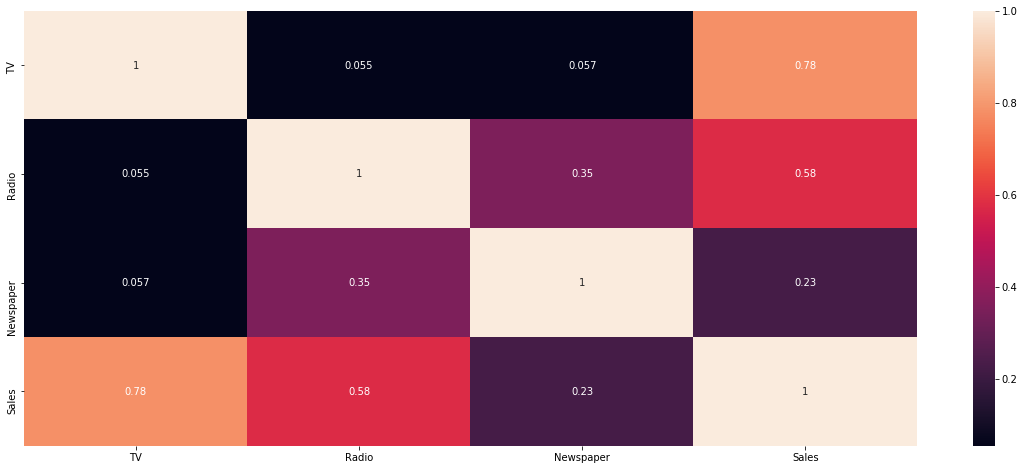

In [21]:
plt.figure(figsize=(20,8))
sns.heatmap(advertising_multi.corr(),annot=True)
plt.show()

In [22]:
X_train_new = X_train[["TV", "Radio"]]
X_test_new = X_test[["TV", "Radio"]]

In [23]:
lm.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred_new = lm.predict(X_test_new)

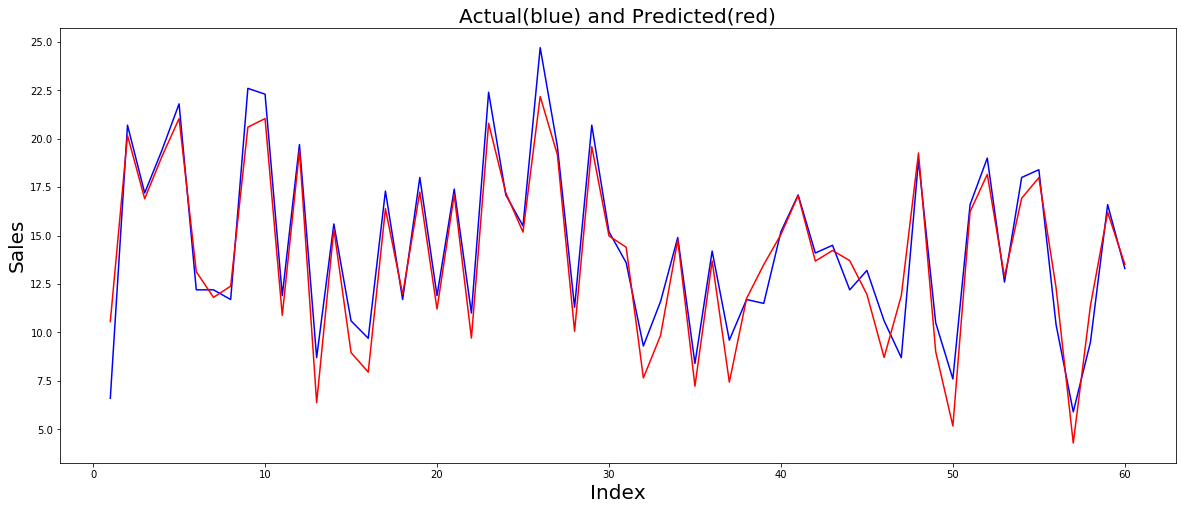

In [33]:
plt.figure(figsize=(20,8))
c= [i for i in range (1,61)]

plt.plot(c, y_test, color='blue')
plt.plot(c, y_pred_new, color='red')

plt.title("Actual(blue) and Predicted(red)",fontsize=20)
plt.xlabel("Index",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.show()

Text(0, 0.5, 'Error')

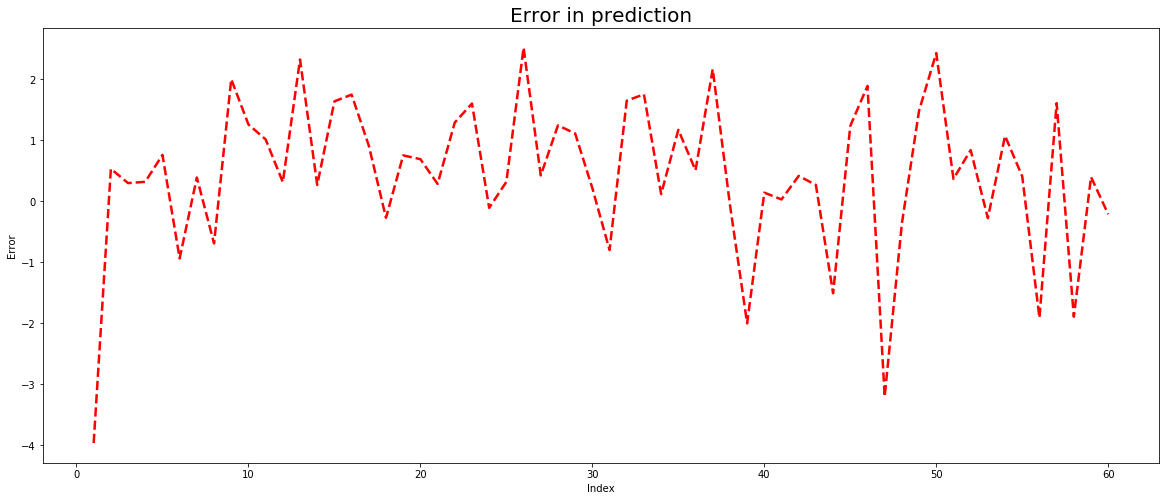

In [37]:
plt.figure(figsize=(20,8))
plt.plot(c,y_test-y_pred_new, color="red", linewidth=2.5, linestyle="--")

plt.title("Error in prediction",fontsize=20)
plt.xlabel("Index")
plt.ylabel("Error")

In [39]:
mse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)

print("mean squared error without newspaper: ",mse_new)
print("r_square_value_without_newspaper: ",r2_new)

mean squared error without newspaper:  1.784740052090281
r_square_value_without_newspaper:  0.909216449171822


In [41]:
X_train_final = X_train_new

X_train_final = sm.add_constant(X_train_final)

lm_final = sm.OLS(y_train,X_train_final).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           4.46e-67
Time:                        12:47:20   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

In [60]:
X_news = advertising_multi[["Newspaper"]]
y_news = advertising_multi[["Sales"]]

X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, train_size=0.7)

lm_news = LinearRegression()

lm_news.fit(X_train_news, y_train_news)

print("Intercept: ",lm_news.intercept_)
print("slope: ",lm_news.coef_)

Intercept:  [12.49719088]
slope:  [[0.05398092]]


In [61]:
y_predict_news = lm_news.predict(X_test_news)

mse_news = mean_squared_error(y_test_news, y_predict_news)
r2_news = r2_score(y_test_news, y_predict_news)

print("Mean_squared_value: ", mse_news)
print("r_squared_value: ", r2_news)


Mean_squared_value:  19.236938122503012
r_squared_value:  0.04782232590835067


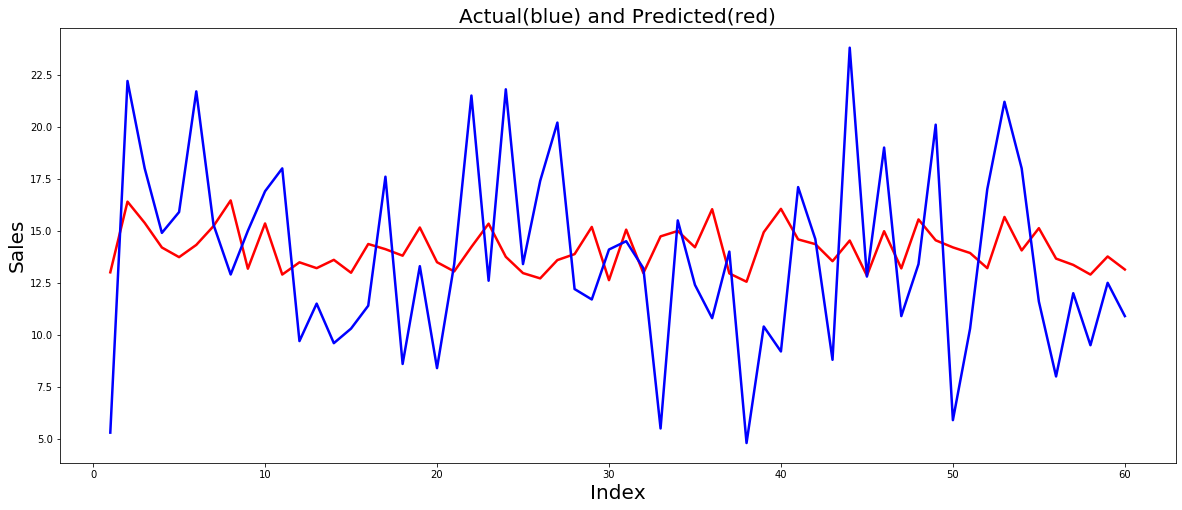

In [64]:
plt.figure(figsize=(20,8))

c= [i for i in range (1,61)]
plt.plot(c, y_predict_news, color="red", linewidth = 2.5)
plt.plot(c, y_test_news, color="blue",linewidth = 2.5)

plt.title("Actual(blue) and Predicted(red)",fontsize=20)
plt.xlabel("Index",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.show()